In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xrayto3d_preprocess import scatterplot_1d,horizontal_line

In [3]:
femur_stats_path = 'femur_stats.csv'
df = pd.read_csv(femur_stats_path)

In [25]:
df[(df['left'] > 0) &(df['right'] == 0)].count()

Unnamed: 0    41
left          41
right         41
dtype: int64

In [26]:
df[(df['left'] == 0) &(df['right'] > 0)].count()

Unnamed: 0    2
left          2
right         2
dtype: int64

In [27]:
df_non_empty = df[(df['left'] > 0) &(df['right'] > 0)]

In [28]:
df_non_empty.count()

Unnamed: 0    528
left          528
right         528
dtype: int64

### scans with voxel count higher than median

In [29]:
df_non_empty[(df_non_empty['left'] > df_non_empty.median(0)['left']) & (df_non_empty['right'] > df_non_empty.median(0)['right'])].count()

/tmp/ipykernel_3432399/2849806962.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_non_empty[(df_non_empty['left'] > df_non_empty.median(0)['left']) & (df_non_empty['right'] > df_non_empty.median(0)['right'])].count()


Unnamed: 0    250
left          250
right         250
dtype: int64

### scans with voxel count higher than threshold

In [30]:
voxel_threshold = 30000
df_selected = df_non_empty[(df_non_empty['left'] > voxel_threshold) & (df_non_empty['right'] > voxel_threshold)]
df_selected.count()
df_selected['Unnamed: 0'].to_csv('subjects_30k.csv',header=None,index=False)

Unnamed: 0    465
left          465
right         465
dtype: int64

### scans with voxel count lower than threshold

In [31]:
df_non_empty[(df_non_empty['left'] < voxel_threshold) & (df_non_empty['right'] < voxel_threshold)].count()

Unnamed: 0    45
left          45
right         45
dtype: int64

In [32]:
df.count()

Unnamed: 0    1204
left          1204
right         1204
dtype: int64

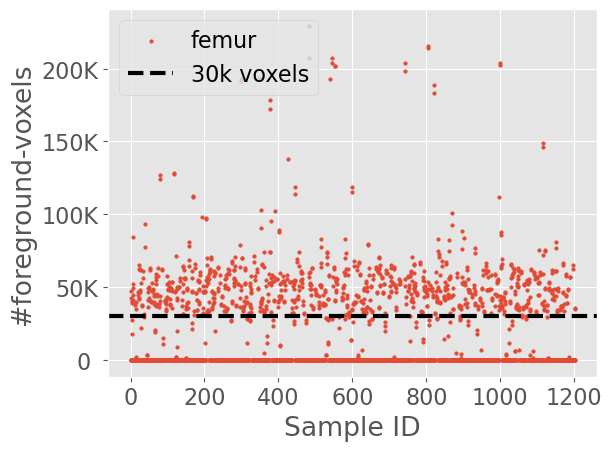

In [12]:
fig,ax =scatterplot_1d(df['right'].tolist(),label='femur')
scatterplot_1d(df['left'].tolist(),label='',fig=fig,ax=ax)
horizontal_line(30000,'30k voxels',color='k',fig=fig,ax=ax)
plt.ylabel('#foreground-voxels')
plt.xlabel('Sample ID')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('totalsegmentator_femur_voxel_plot.pdf')

### save subjects that qualify